In [2]:
pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 71.6 MB/s eta 0:00:00


In [3]:
pip install planetary_computer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/pystac_client/item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(
<ipython-input-4-5e9786e75f83>:13: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  img_arr = rioxarray.open_rasterio(item.assets["elevation"].href).squeeze().drop("band")


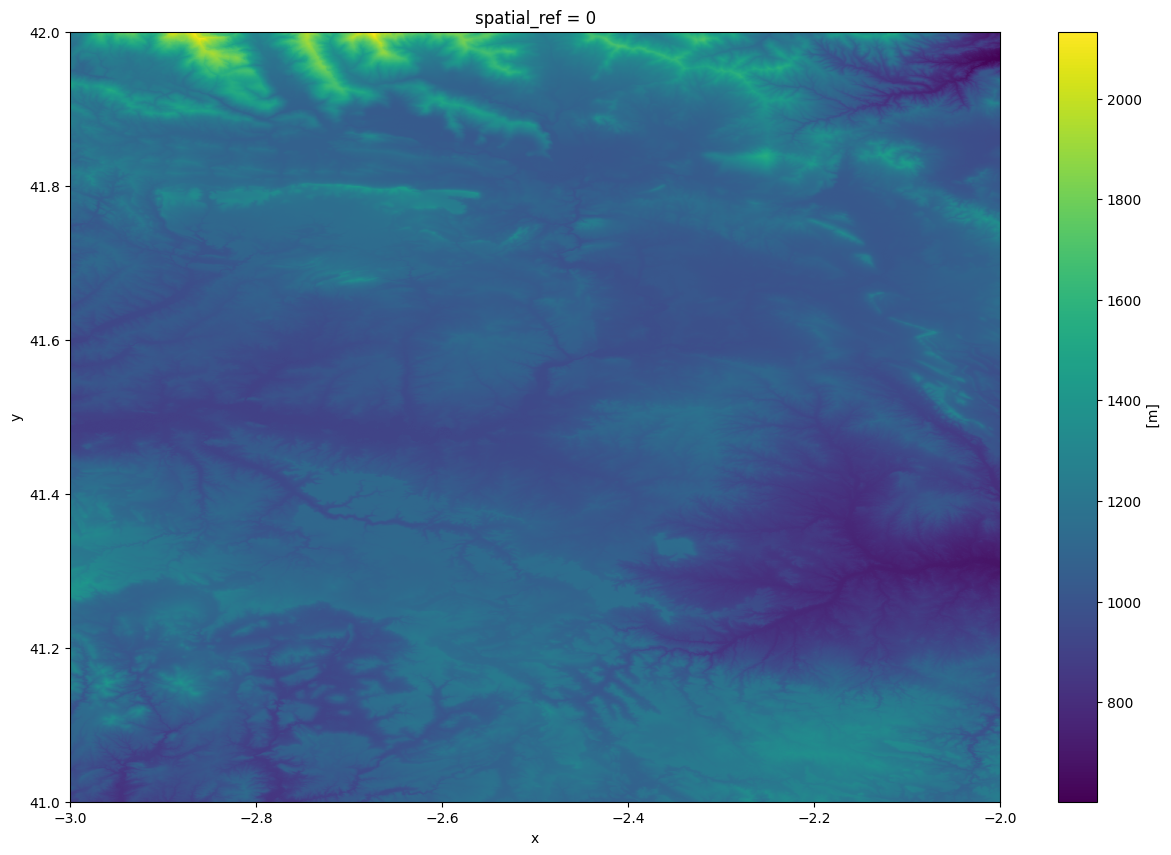

In [4]:
import pystac_client
import planetary_computer
import rioxarray

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
point = {"type": "Point", "coordinates": [-2.3842773437513074, 41.77131167976444]}
search = catalog.search(collections=["nasadem"], intersects=point, limit=1)
item = next(search.get_items())

img_arr = rioxarray.open_rasterio(item.assets["elevation"].href).squeeze().drop("band")
img_arr.plot.imshow(figsize=(15, 10));